In [3]:
from DQN import DQN, DQN_D, DQN_GAEX
from MDP_chain import MDP_chain
from tqdm.notebook import tqdm
import torch
import torch.nn as nn
import math
import random
import matplotlib.pyplot as plt
import numpy as np
from functools import partial

If you change to cpu, need to change `device` in `DQN.py`, `GAN.py` and `MDP_chain.py` as well

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# device = 'cpu'

Simple DQN execution & plot with N = 10

In [5]:
n_states = 10
steps = n_states + 9
n_episodes = 1000
dqn_update_freq = 2 * steps
gan_update_freq = 2 * steps
env = MDP_chain(n_states)

In [ ]:
dqn = DQN(dqn_update_freq)

In [ ]:
rewards = []
for episode in tqdm(range(n_episodes)):
    s = env.reset()
    s = torch.tensor([s], dtype=torch.float32, device=device).unsqueeze(0)
    reward = 0
    for t in range(steps):
        a = dqn.action(s)
        r, s_n = env.step(a)
        
        if t+1 == steps:
            s_n = None
        else:
            reward += r.cpu().item()
            
        dqn.remember(s, a, s_n, r)
        sa_vals, exp_sa_vals = dqn.step()
        if sa_vals is not None:
            dqn.optimize(sa_vals, exp_sa_vals)
        
        s = s_n
            
    rewards.append(reward)

In [ ]:
plt.plot(rewards)

DQN + Discriminator execution & plot with N = 10

In [ ]:
dqn_d = DQN_D(n_states, dqn_update_freq, gan_update_freq)

In [ ]:
rewards = []
for episode in tqdm(range(n_episodes)):
    s = env.reset()
    s = torch.tensor([s], dtype=torch.float32, device=device).unsqueeze(0)
    reward = 0
    for t in range(steps):
        a = dqn_d.action(s)
        r, s_n = env.step(a)
        
        if t+1 == steps:
            s_n = None
        else:
            reward += r.cpu().item()
            
        dqn_d.remember(s, a, s_n, r)
        sa_vals, exp_sa_vals = dqn_d.step()
        if sa_vals is not None:
            dqn_d.optimize(sa_vals, exp_sa_vals)
        
        s = s_n
            
    rewards.append(reward)

In [ ]:
plt.plot(rewards)

DQN-GAEX execution & plot with N = 10

In [ ]:
dqn_gaex = DQN_GAEX(n_states, dqn_update_freq, gan_update_freq)

In [ ]:
rewards = []
for episode in tqdm(range(1000)):
    s = env.reset()
    s = torch.tensor([s], dtype=torch.float32, device=device).unsqueeze(0)
    reward = 0
    for t in range(steps):
        a = dqn_gaex.action(s)
        r, s_n = env.step(a)
        
        if t+1 == steps:
            s_n = None
        else:
            reward += r.cpu().item()
            
        dqn_gaex.remember(s, a, s_n, r)
        sa_vals, exp_sa_vals = dqn_gaex.step()
        if sa_vals is not None:
            dqn_gaex.optimize(sa_vals, exp_sa_vals)
        
        s = s_n
            
    rewards.append(reward)

In [ ]:
plt.plot(rewards)

#### Here begins running all three; change `n_episodes` and `n_iters` to change how many episodes and iterations to run for each experiment; average is taken regardless of choice

N = 10 states

In [6]:
n_episodes = 1000
n_iters = 1

In [7]:
n_states = 10
steps = n_states + 9
dqn_update_freq = 2 * steps
gan_update_freq = 2 * steps
env = MDP_chain(n_states)

In [8]:
DQN_f = partial(DQN, dqn_update_freq)
DQN_D_f = partial(DQN_D, n_states, dqn_update_freq, gan_update_freq)
DQN_GAEX_f = partial(DQN_GAEX, n_states, dqn_update_freq, gan_update_freq)

In [9]:
%%time
rewards_10 = np.zeros((n_iters, 3, n_episodes))
max_states_10 = np.zeros((n_iters,3,n_episodes))
for idx in tqdm(range(n_iters), desc='iters', position=0, leave=True):
    for jdx, model_f in tqdm(enumerate((DQN_f, DQN_D_f, DQN_GAEX_f)), desc='model', total=3, position=1, leave=True):
        model = model_f()
        for eps in tqdm(range(n_episodes), desc='episode', position=2, leave=False):
            s = env.reset()
            max_state = s
            s = torch.tensor([s], dtype=torch.float32, device=device).unsqueeze(0)
            reward = 0
            for t in range(steps):
                a = model.action(s)
                r, s_n = env.step(a)

                if t+1 == steps:
                    s_n = None
                else:
                    reward += r.cpu().item()

                model.remember(s, a, s_n, r)
                sa_vals, exp_sa_vals = model.step()
                if sa_vals is not None:
                    model.optimize(sa_vals, exp_sa_vals)

                s = s_n
                if s is not None and s > max_state:
                    max_state = s

            rewards_10[idx][jdx][eps] = reward
            max_states_10[idx][jdx][eps] = max_state

iters:   0%|          | 0/1 [00:00<?, ?it/s]

model:   0%|          | 0/3 [00:00<?, ?it/s]

episode:   0%|          | 0/1000 [00:00<?, ?it/s]

episode:   0%|          | 0/1000 [00:00<?, ?it/s]

episode:   0%|          | 0/1000 [00:00<?, ?it/s]

CPU times: user 3min 34s, sys: 25.9 s, total: 4min
Wall time: 4min


N = 200 states

In [10]:
n_episodes = 1000
n_iters = 1

In [11]:
n_states = 200
steps = n_states + 9
dqn_update_freq = 2 * steps
gan_update_freq = 2 * steps
env = MDP_chain(n_states)

In [12]:
DQN_f = partial(DQN, dqn_update_freq)
DQN_D_f = partial(DQN_D, n_states, dqn_update_freq, gan_update_freq)
DQN_GAEX_f = partial(DQN_GAEX, n_states, dqn_update_freq, gan_update_freq)

In [13]:
%%time
rewards_200 = np.zeros((n_iters, 3, n_episodes))
max_states_200 = np.zeros((n_iters,3,n_episodes))
for idx in tqdm(range(n_iters), desc='iters', position=0, leave=True):
    for jdx, model_f in tqdm(enumerate((DQN_f, DQN_D_f, DQN_GAEX_f)), desc='model', total=3, position=1, leave=True):
        model = model_f()
        for eps in tqdm(range(n_episodes), desc='episode', position=2, leave=False):
            s = env.reset()
            max_state = s
            s = torch.tensor([s], dtype=torch.float32, device=device).unsqueeze(0)
            reward = 0
            for t in tqdm(range(steps), desc='step', position=3, leave=False):
                a = model.action(s)
                r, s_n = env.step(a)

                if t+1 == steps:
                    s_n = None
                else:
                    reward += r.cpu().item()

                model.remember(s, a, s_n, r)
                sa_vals, exp_sa_vals = model.step()
                if sa_vals is not None:
                    model.optimize(sa_vals, exp_sa_vals)

                s = s_n
                if s is not None and s > max_state:
                    max_state = s

            rewards_200[idx][jdx][eps] = reward
            max_states_200[idx][jdx][eps] = max_state

iters:   0%|          | 0/1 [00:00<?, ?it/s]

model:   0%|          | 0/3 [00:00<?, ?it/s]

episode:   0%|          | 0/1000 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

episode:   0%|          | 0/1000 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

episode:   0%|          | 0/1000 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

step:   0%|          | 0/209 [00:00<?, ?it/s]

CPU times: user 1h 40min 15s, sys: 6min 10s, total: 1h 46min 25s
Wall time: 51min 16s


N = 100 states

In [14]:
n_episodes = 1000
n_iters = 1

In [15]:
n_states = 1000
steps = n_states + 9
dqn_update_freq = 2 * steps
gan_update_freq = 2 * steps
env = MDP_chain(n_states)

In [16]:
DQN_f = partial(DQN, dqn_update_freq)
DQN_D_f = partial(DQN_D, n_states, dqn_update_freq, gan_update_freq)
DQN_GAEX_f = partial(DQN_GAEX, n_states, dqn_update_freq, gan_update_freq)

In [17]:
%%time
rewards_1000 = np.zeros((n_iters, 3, n_episodes))
max_states_1000 = np.zeros((n_iters,3,n_episodes))
for idx in tqdm(range(n_iters), desc='iters', position=0, leave=True):
    for jdx, model_f in tqdm(enumerate((DQN_f, DQN_D_f, DQN_GAEX_f)), desc='model', total=3, position=1, leave=True):
        model = model_f()
        for eps in tqdm(range(n_episodes), desc='episode', position=2, leave=False):
            s = env.reset()
            max_state = s
            s = torch.tensor([s], dtype=torch.float32, device=device).unsqueeze(0)
            reward = 0
            for t in tqdm(range(steps), desc='step', position=3, leave=False):
                a = model.action(s)
                r, s_n = env.step(a)

                if t+1 == steps:
                    s_n = None
                else:
                    reward += r.cpu().item()

                model.remember(s, a, s_n, r)
                sa_vals, exp_sa_vals = model.step()
                if sa_vals is not None:
                    model.optimize(sa_vals, exp_sa_vals)

                s = s_n
                if s is not None and s > max_state:
                    max_state = s

            rewards_1000[idx][jdx][eps] = reward
            max_states_1000[idx][jdx][eps] = max_state

iters:   0%|          | 0/1 [00:00<?, ?it/s]

model:   0%|          | 0/3 [00:00<?, ?it/s]

episode:   0%|          | 0/1000 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

episode:   0%|          | 0/1000 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

episode:   0%|          | 0/1000 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

step:   0%|          | 0/1009 [00:00<?, ?it/s]

CPU times: user 8h 37min 14s, sys: 29min 31s, total: 9h 6min 46s
Wall time: 4h 15min 59s


Plotting of all 3 experiments

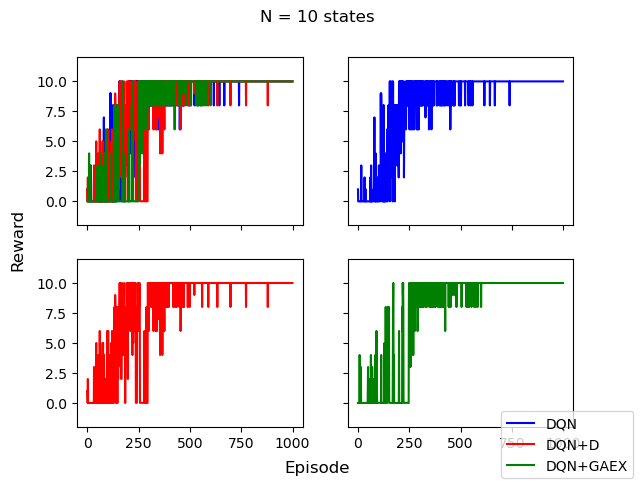

In [84]:
fig, axs = plt.subplots(2,2, sharey=True, sharex=True)
plt.ylim(-2, 12)
labels = ['DQN', 'DQN+D', 'DQN+GAEX']
axs[0,0].plot(rewards_10.mean(0)[0], color='blue', label='DQN')
axs[0,0].plot(rewards_10.mean(0)[1], color='red', label='DQN+D')
axs[0,0].plot(rewards_10.mean(0)[2], color='green', label='DQN+GAEX')
dqn_line = axs[0,1].plot(rewards_10.mean(0)[0], color='blue', label='DQN')
dqnd_line = axs[1,0].plot(rewards_10.mean(0)[1], color='red', label='DQN+D')
dqngaex_line = axs[1,1].plot(rewards_10.mean(0)[2], color='green', label='DQN+GAEX')

lines = []
for ax in fig.axes:
    line, _ = ax.get_legend_handles_labels()
    lines.append(line)

fig.suptitle('N = 10 states')
fig.supxlabel('Episode')
fig.supylabel('Reward')
fig.legend(lines[0], labels, loc='lower right', ncol=1)
fig.savefig('imgs/10_reward.png')

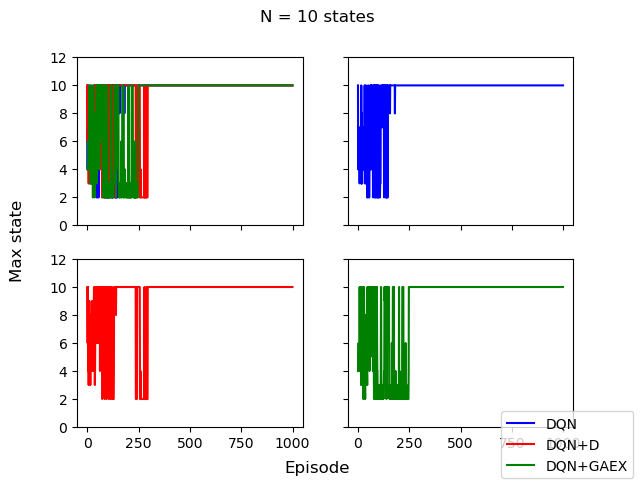

In [85]:
fig, axs = plt.subplots(2,2, sharey=True, sharex=True)
plt.ylim(0, 12)
labels = ['DQN', 'DQN+D', 'DQN+GAEX']
axs[0,0].plot(max_states_10.mean(0)[0], color='blue', label='DQN')
axs[0,0].plot(max_states_10.mean(0)[1], color='red', label='DQN+D')
axs[0,0].plot(max_states_10.mean(0)[2], color='green', label='DQN+GAEX')
dqn_line = axs[0,1].plot(max_states_10.mean(0)[0], color='blue', label='DQN')
dqnd_line = axs[1,0].plot(max_states_10.mean(0)[1], color='red', label='DQN+D')
dqngaex_line = axs[1,1].plot(max_states_10.mean(0)[2], color='green', label='DQN+GAEX')

lines = []
for ax in fig.axes:
    line, _ = ax.get_legend_handles_labels()
    lines.append(line)

fig.suptitle('N = 10 states')
fig.supxlabel('Episode')
fig.supylabel('Max state')
fig.legend(lines[0], labels, loc='lower right', ncol=1)
fig.savefig('imgs/10_maxstate.png')

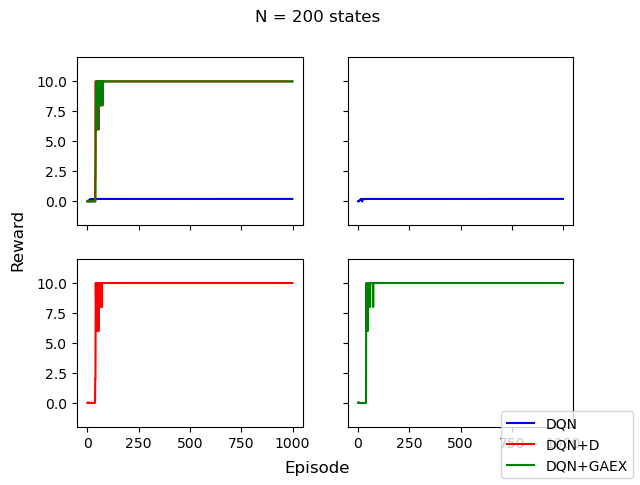

In [86]:
fig, axs = plt.subplots(2,2, sharey=True, sharex=True)
plt.ylim(-2, 12)
labels = ['DQN', 'DQN+D', 'DQN+GAEX']
axs[0,0].plot(rewards_200.mean(0)[0], color='blue', label='DQN')
axs[0,0].plot(rewards_200.mean(0)[1], color='red', label='DQN+D')
axs[0,0].plot(rewards_200.mean(0)[2], color='green', label='DQN+GAEX')
dqn_line = axs[0,1].plot(rewards_200.mean(0)[0], color='blue', label='DQN')
dqnd_line = axs[1,0].plot(rewards_200.mean(0)[1], color='red', label='DQN+D')
dqngaex_line = axs[1,1].plot(rewards_200.mean(0)[2], color='green', label='DQN+GAEX')

lines = []
for ax in fig.axes:
    line, _ = ax.get_legend_handles_labels()
    lines.append(line)

fig.suptitle('N = 200 states')
fig.supxlabel('Episode')
fig.supylabel('Reward')
fig.legend(lines[0], labels, loc='lower right', ncol=1)
fig.savefig('imgs/200_reward.png')

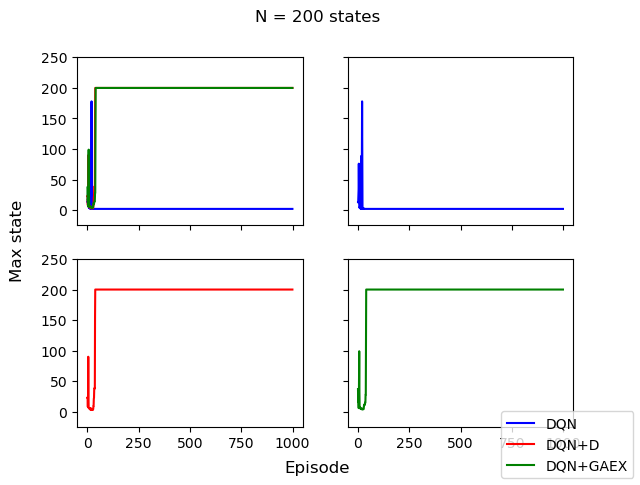

In [87]:
fig, axs = plt.subplots(2,2, sharey=True, sharex=True)
plt.ylim(-25, 250)
labels = ['DQN', 'DQN+D', 'DQN+GAEX']
axs[0,0].plot(max_states_200.mean(0)[0], color='blue', label='DQN')
axs[0,0].plot(max_states_200.mean(0)[1], color='red', label='DQN+D')
axs[0,0].plot(max_states_200.mean(0)[2], color='green', label='DQN+GAEX')
dqn_line = axs[0,1].plot(max_states_200.mean(0)[0], color='blue', label='DQN')
dqnd_line = axs[1,0].plot(max_states_200.mean(0)[1], color='red', label='DQN+D')
dqngaex_line = axs[1,1].plot(max_states_200.mean(0)[2], color='green', label='DQN+GAEX')

lines = []
for ax in fig.axes:
    line, _ = ax.get_legend_handles_labels()
    lines.append(line)

fig.suptitle('N = 200 states')
fig.supxlabel('Episode')
fig.supylabel('Max state')
fig.legend(lines[0], labels, loc='lower right', ncol=1)
fig.savefig('imgs/200_maxstate.png')

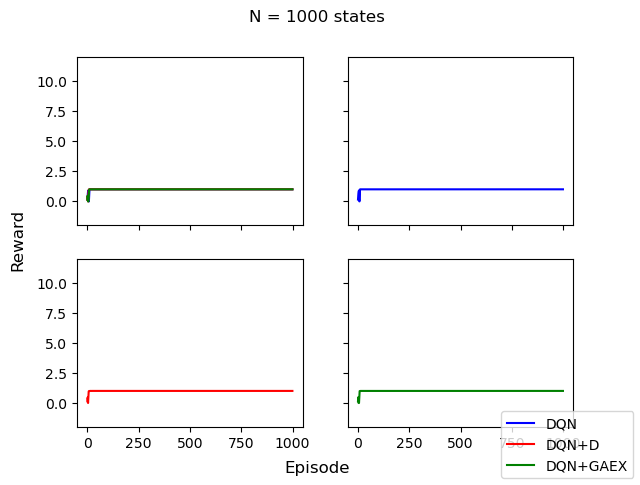

In [88]:
fig, axs = plt.subplots(2,2, sharey=True, sharex=True)
plt.ylim(-2, 12)
labels = ['DQN', 'DQN+D', 'DQN+GAEX']
axs[0,0].plot(rewards_1000.mean(0)[0], color='blue', label='DQN')
axs[0,0].plot(rewards_1000.mean(0)[1], color='red', label='DQN+D')
axs[0,0].plot(rewards_1000.mean(0)[2], color='green', label='DQN+GAEX')
dqn_line = axs[0,1].plot(rewards_1000.mean(0)[0], color='blue', label='DQN')
dqnd_line = axs[1,0].plot(rewards_1000.mean(0)[1], color='red', label='DQN+D')
dqngaex_line = axs[1,1].plot(rewards_1000.mean(0)[2], color='green', label='DQN+GAEX')

lines = []
for ax in fig.axes:
    line, _ = ax.get_legend_handles_labels()
    lines.append(line)

fig.suptitle('N = 1000 states')
fig.supxlabel('Episode')
fig.supylabel('Reward')
fig.legend(lines[0], labels, loc='lower right', ncol=1)
fig.savefig('imgs/1000_reward.png')

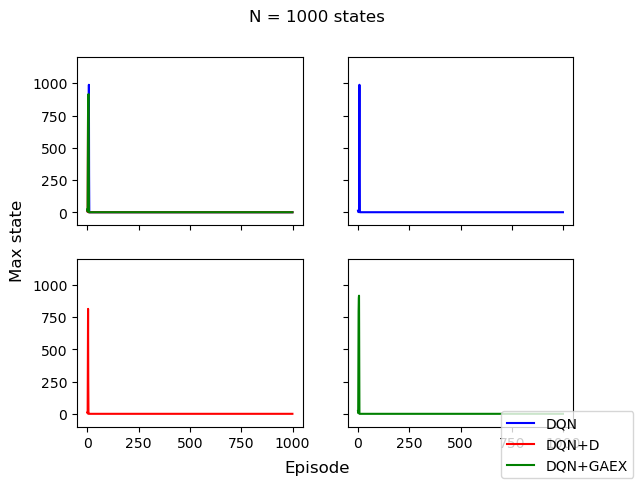

In [89]:
fig, axs = plt.subplots(2,2, sharey=True, sharex=True)
plt.ylim(-100, 1200)
labels = ['DQN', 'DQN+D', 'DQN+GAEX']
axs[0,0].plot(max_states_1000.mean(0)[0], color='blue', label='DQN')
axs[0,0].plot(max_states_1000.mean(0)[1], color='red', label='DQN+D')
axs[0,0].plot(max_states_1000.mean(0)[2], color='green', label='DQN+GAEX')
dqn_line = axs[0,1].plot(max_states_1000.mean(0)[0], color='blue', label='DQN')
dqnd_line = axs[1,0].plot(max_states_1000.mean(0)[1], color='red', label='DQN+D')
dqngaex_line = axs[1,1].plot(max_states_1000.mean(0)[2], color='green', label='DQN+GAEX')

lines = []
for ax in fig.axes:
    line, _ = ax.get_legend_handles_labels()
    lines.append(line)

fig.suptitle('N = 1000 states')
fig.supxlabel('Episode')
fig.supylabel('Max state')
fig.legend(lines[0], labels, loc='lower right', ncol=1)
fig.savefig('imgs/1000_maxstate.png')